# Generating Figures from CorGI-REx I

This Jupyter notebook produces the figures in CoronaGraph Instrument Reference stars for Exoplanets I: Preliminary Vetting and Implications for the Roman Coronagraph and Habitable Worlds Observatory.

In [1]:
# import all required packages and set matplotlib parameters
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from roman_pointing.roman_pointing import calcRomanAngles, getL2Positions, getSunPositions
import astropy
import pandas
from astroquery.simbad import Simbad
import time
import astropy.units as u
from astropy.coordinates import (
    SkyCoord,
    Distance,
    get_body_barycentric,
    BarycentricMeanEcliptic,
    HeliocentricTrueEcliptic,
    HeliocentricMeanEcliptic,
    Galactic,
    ICRS,
    GeocentricTrueEcliptic
)
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch,Rectangle
import matplotlib.ticker as ticker
from astropy.time import Time
from astropy.table import vstack
from astroquery.jplhorizons import Horizons
import glob
import os
mpl.rc('font',family='Times')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

/Users/jrhom/anaconda3/envs/Disk_ETCs_Cartopy/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


## Figure 1

This figure requires reading "HLC_prof.csv" and shows how much an off-axis source introduces incoherent light into a Roman Coronagraph dark hole.

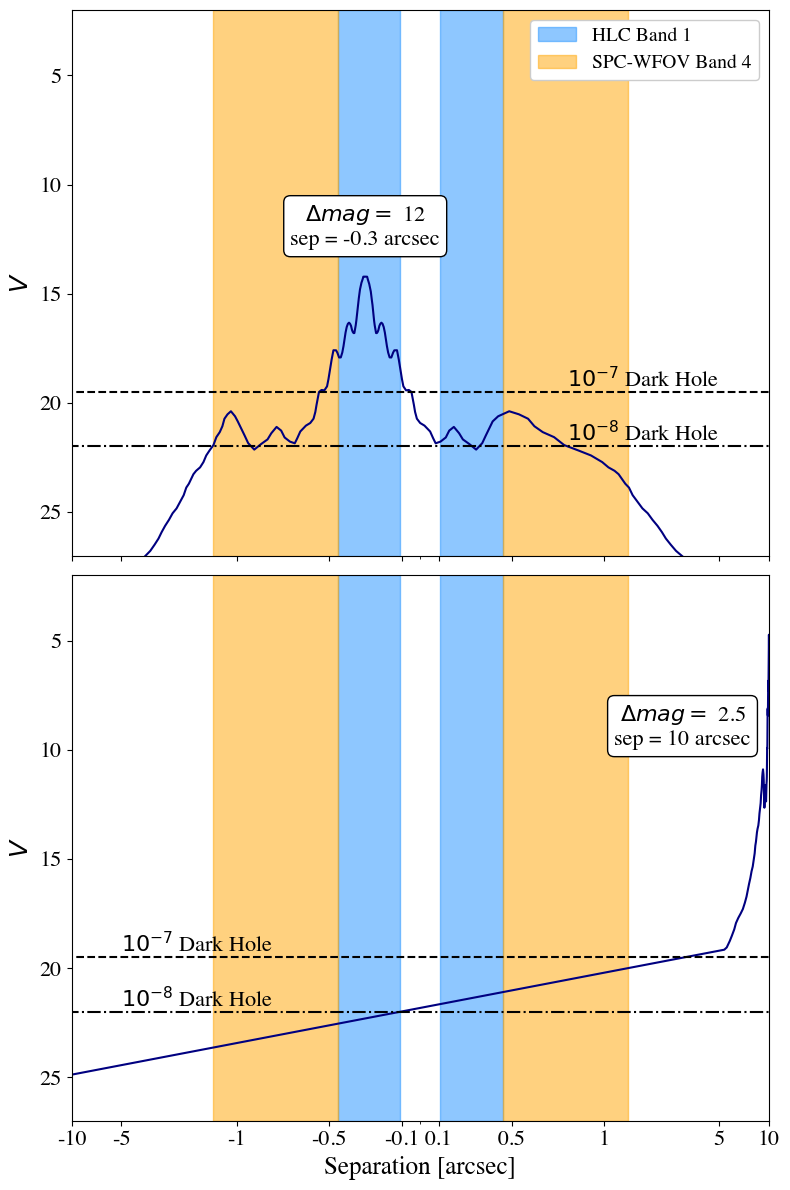

In [2]:
primarymag=2 #magnitude of the host star
comp_sep=-0.3 #companion separation
comp_delta_mag=12 #companion delta magnitude
comp_sep2 = 10 #companion separation for plot 2
comp_delta_mag2 = 2.5 #companion delta magnitude for plot 2
save = False #Save plot or no
hlc_profile = 'HLC_prof.csv'
separation = np.loadtxt(hlc_profile,usecols=0,delimiter=',')
contrast = np.loadtxt(hlc_profile,usecols=1,delimiter=',')
#The loaded profile is only half of a PSF profile, so create a mirror of it on the other side
lefthalfseps = separation[::-1]*-1.0
lefthalfcontrast = contrast[::-1]
fullseps = np.append(lefthalfseps,separation)
fullcontrast = np.append(lefthalfcontrast,contrast)

legend_elements1 = [Patch(color='dodgerblue', alpha=0.5,label='HLC Band 1'),
    					Patch(color='orange', alpha=0.5,label='SPC-WFOV Band 4')
    					]
#Make the plot
fig1,[ax1,ax2] = plt.subplots(2,1,figsize=(8,12))

ax1.plot(fullseps+comp_sep,-2.5*np.log10(fullcontrast)+comp_delta_mag+primarymag,label='Unocculted PSF Profile',color='navy')
#make horizontal lines for 1e-7 and 1e-8 contrast levels
ax1.plot(fullseps,np.ones_like(fullcontrast)*(primarymag+17.5),linestyle='--',label=r'10$^{-7}$ Contrast',color='k')
ax1.plot(fullseps,np.ones_like(fullcontrast)*(primarymag+20.0),linestyle='-.',label=r'10$^{-8}$ Contrast',color='k')
if comp_sep>0: #optimized placing of text
	ax1.text(-5,(primarymag+17.5),r'$10^{-7}$ Dark Hole',color='k',horizontalalignment='left',va='bottom',fontsize=16)
	ax1.text(-5,(primarymag+20.0),r'$10^{-8}$ Dark Hole',color='k',horizontalalignment='left',va='bottom',fontsize=16)
elif comp_sep<0:
	ax1.text(5,(primarymag+17.5),r'$10^{-7}$ Dark Hole',color='k',horizontalalignment='right',va='bottom',fontsize=16)
	ax1.text(5,(primarymag+20.0),r'$10^{-8}$ Dark Hole',color='k',horizontalalignment='right',va='bottom',fontsize=16)
if comp_sep>5:
	defaultx1 = 3
elif comp_sep<-5:
	defaultx1 = -3
else:
	defaultx1 = comp_sep

if primarymag+comp_delta_mag-1 < 10:
	defaulty1 = 10
else:
	defaulty1 = primarymag+comp_delta_mag-1

#Create a text box describing the companion separation and delta magnitudes for the plots
ax1.text(defaultx1,defaulty1,r'$\Delta mag = $ '+str(comp_delta_mag)+"\n"+ 'sep = '+str(comp_sep)+' arcsec',color='k',horizontalalignment='center',va='bottom',fontsize=16,
         				bbox=dict(boxstyle="round",
                   			ec='k',
                  			fc='w'))
#Plot shaded regions that represent instrument mode FOVs
#HLC Band 1
ax1.axvspan(0.110,0.450,alpha=0.5,color='dodgerblue')
ax1.axvspan(-0.450,-0.110,alpha=0.5,color='dodgerblue')
#SPC-WFOV Band 4
ax1.axvspan(0.450,1.40,alpha=0.5,color='orange')
ax1.axvspan(-1.40,-0.450,alpha=0.5,color='orange')
ax1.set_xscale('symlog',linthresh=1)
ax1.set_xticks([-10,-5,-1,-0.5,-0.1, 0.1, 0.5, 1, 5,10])
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.set_ylabel(r'$V$',fontsize=18)
ax1.yaxis.set_inverted(True)
ax1.set_xlim([-10,10])
ax1.set_ylim([25+primarymag,primarymag])
ax1.legend(handles=legend_elements1,fontsize=14,loc=1,framealpha=1.0)
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2g'))
ax1.set_xticklabels([])
ax1.tick_params(axis='both', which='major', labelsize=16)

#Plot 2nd plot

ax2.plot(fullseps+comp_sep2,-2.5*np.log10(fullcontrast)+comp_delta_mag2+primarymag,label='Unocculted PSF Profile',color='navy')
ax2.plot(fullseps,np.ones_like(fullcontrast)*(primarymag+17.5),linestyle='--',label=r'10$^{-7}$ Contrast',color='k')
ax2.plot(fullseps,np.ones_like(fullcontrast)*(primarymag+20.0),linestyle='-.',label=r'10$^{-8}$ Contrast',color='k')
if comp_sep2>0:
	ax2.text(-5,(primarymag+17.5),r'$10^{-7}$ Dark Hole',color='k',horizontalalignment='left',va='bottom',fontsize=16)
	ax2.text(-5,(primarymag+20.0),r'$10^{-8}$ Dark Hole',color='k',horizontalalignment='left',va='bottom',fontsize=16)
elif comp_sep2<0:
	ax2.text(5,(primarymag+17.5),r'$10^{-7}$ Dark Hole',color='k',horizontalalignment='right',va='bottom',fontsize=16)
	ax2.text(5,(primarymag+20.0),r'$10^{-8}$ Dark Hole',color='k',horizontalalignment='right',va='bottom',fontsize=16)
if comp_sep2>5:
	defaultx2 = 3
elif comp_sep2<-5:
	defaultx2 = -3
else:
	defaultx2 = comp_sep2

if primarymag+comp_delta_mag2-1 < 10:
	defaulty2 = 10
else:
	defaulty2 = primarymag+comp_delta_mag2-1


ax2.text(defaultx2,defaulty2,r'$\Delta mag = $ '+str(comp_delta_mag2)+"\n"+ 'sep = '+str(comp_sep2)+' arcsec',color='k',horizontalalignment='center',va='bottom',fontsize=16,
         				bbox=dict(boxstyle="round",
                   			ec='k',
                  			fc='w'))

ax2.axvspan(0.110,0.450,alpha=0.5,color='dodgerblue')
ax2.axvspan(-0.450,-0.110,alpha=0.5,color='dodgerblue')
ax2.axvspan(0.450,1.40,alpha=0.5,color='orange')
ax2.axvspan(-1.40,-0.450,alpha=0.5,color='orange')
ax2.set_xscale('symlog',linthresh=1)
ax2.set_xticks([-10,-5,-1,-0.5,-0.1, 0.1, 0.5, 1, 5,10])
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xlabel('Separation [arcsec]',fontsize=18)
ax2.set_ylabel(r'$V$',fontsize=18)
ax2.yaxis.set_inverted(True)
ax2.set_xlim([-10,10])
ax2.set_ylim([25+primarymag,primarymag])
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2g'))
ax2.tick_params(axis='both', which='major', labelsize=16)
	
fig1.tight_layout()
if save==True:
	fig1.savefig('OffAxisGlint.pdf')
plt.show()

## Figure 2

Generate a sky coverage map of the reference star candidates in Ecliptic coordinates. Requires being able to load in "RefStar_S10_amendGrade.csv." NOTE: The code to generate RefStar_S10_amendGrade.csv is separate from this notebook.

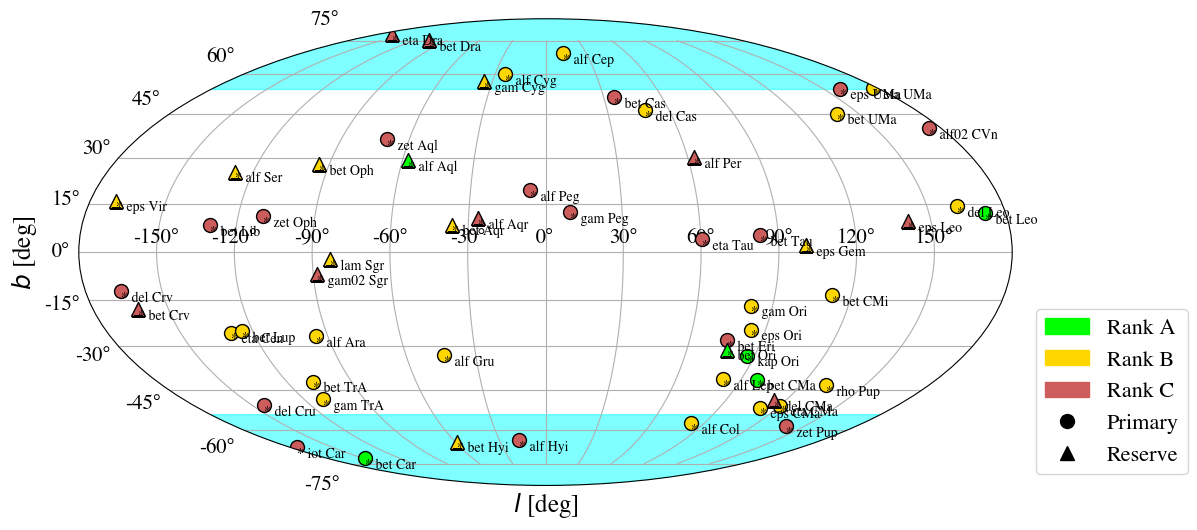

In [3]:
nameplot = True #Make the plot with star names overlaid, makes it look messy
database = pandas.read_csv('RefStar_S10_amendGrade.csv') #Load reference star catalog

fig1, ax1 = plt.subplots(1, 1,figsize=(12,6),subplot_kw={'projection': 'mollweide'}) #Set up plot
ax1.grid(True) #gridlines for coordinates
ax1.axhspan(np.deg2rad(54), np.deg2rad(90), alpha=0.5, color='cyan') #CVZ N
ax1.axhspan(np.deg2rad(-90), np.deg2rad(-54), alpha=0.5, color='cyan') #CVZ S
ax1.set_xlabel(r'$l$ [deg]',fontsize=18)
ax1.set_ylabel(r'$b$ [deg]',fontsize=18)
epochtime = Time('J2027',format='jyear_str')
equitime = Time(2027.0,format='decimalyear')
for i in np.arange(database.shape[0]):
    #Set up astropy coordinates for each star, apply space motion to 2027
	if np.isnan(database.loc[i,"ra2016"]) == False and np.isnan(database.loc[i,"pmdec2016"]) == False:
		ra = database.loc[i,"ra2016"]
		dec = database.loc[i,"dec2016"]
		pmra = database.loc[i,"pmra2016"]
		pmdec = database.loc[i,"pmdec2016"]
		plx = database.loc[i,"sy_plx2016"]
		radv = database.loc[i,"st_radv2016"]
		obstime = "J2016"
		if np.isnan(plx) == True or plx<=0:
			plx = database.loc[i,"sy_plx2015.5"]
		if np.isnan(pmra) == True:
			pmra = database.loc[i,"pmra2015.5"]
		if np.isnan(pmdec) == True:
			pmdec = database.loc[i,"pmdec2015.5"]
		if np.isnan(radv) == True:
			radv = database.loc[i,"st_radv2015.5"]
	elif np.isnan(database.loc[i,"ra2015.5"]) == False and np.isnan(database.loc[i,"pmdec2015.5"]) == False and np.isnan(database.loc[i,"ra2016"]) == True and np.isnan(database.loc[i,"pmdec2016"]) == True:
		ra = database.loc[i,"ra2015.5"]
		dec = database.loc[i,"dec2015.5"]
		pmra = database.loc[i,"pmra2015.5"]
		pmdec = database.loc[i,"pmdec2015.5"]
		plx = database.loc[i,"sy_plx2015.5"]
		radv = database.loc[i,"st_radv2015.5"]
		obstime = "J2015.5"
		if np.isnan(plx) == True or plx<=0:
			plx = database.loc[i,"sy_plx"]
		if np.isnan(pmra) == True:
			pmra = database.loc[i,"pmra"]
		if np.isnan(pmdec) == True:
			pmdec = database.loc[i,"pmdec"]
		if np.isnan(radv) == True:
			radv = database.loc[i,"st_radv"]
	else:
		ra = database.loc[i,"ra"]
		dec = database.loc[i,"dec"]
		pmra = database.loc[i,"sy_pmra"]
		pmdec = database.loc[i,"sy_pmdec"]
		plx = database.loc[i,"sy_plx"]
		radv = database.loc[i,"st_radv"]
		obstime = "J2000"

	if np.isnan(plx) == True or plx<=0:
		plx = 0.0001
	if np.isnan(pmra) == True:
		pmra = 0.0
	if np.isnan(pmdec) == True:
		pmdec = 0.0
	if np.isnan(radv) == True:
		radv = 0.0
	target = SkyCoord(
                    ra,
                    dec,
                    unit=(u.deg, u.deg),
                    frame="icrs",
                    distance=Distance(parallax=plx * u.mas),
                    pm_ra_cosdec=pmra * (u.mas/u.yr),
                    pm_dec=pmdec * (u.mas/u.yr),
                    radial_velocity=radv * (u.km/u.s),
                    equinox=obstime,
                    obstime=obstime,
                    )

	newtarget = target.apply_space_motion(new_obstime=epochtime) #Account for proper motion of targets to year 2027

	newECL = newtarget.transform_to(HeliocentricTrueEcliptic(equinox=Time(2027.0,format='decimalyear'),obstime=Time('J2027',format='jyear_str')))

	ra_rad = newECL.lon.wrap_at(180 * u.deg).radian
	dec_rad = newECL.lat.radian

    #Plot according to rank
	if database.loc[i,"st_psfgrade"] == 'A':
		markercolor = 'lime'

	elif database.loc[i,"st_psfgrade"] == 'B':
		markercolor = 'gold'

	elif database.loc[i,"st_psfgrade"] == 'C':
		markercolor = 'indianred'
    #Plot primary vs. reserve
	if i <= 39:
		markershape = 'o'
	elif i > 39:
		markershape = '^'


	if database.loc[i,"st_psfgrade"] != 'F': #Do not accidentally plot rejected reference stars
		ax1.plot(ra_rad,dec_rad,marker=markershape,linestyle='None',color=markercolor,markersize=10,markeredgecolor='black')
		if nameplot == True:
			ax1.text(ra_rad,dec_rad,database.loc[i,"main_id"],fontweight='extra bold',horizontalalignment='left',verticalalignment='top')


legend_elements1 = [Patch(color='lime', label='Rank A'),
    					Patch(color='gold', label='Rank B'),
    					Patch(color='indianred', label='Rank C'),
                   Line2D([0], [0], marker='o', color='black', label='Primary',linestyle='None',
                          markerfacecolor='black', markersize=10),
                   Line2D([0], [0], marker='^', color='black', label='Reserve',linestyle='None',
                          markerfacecolor='black', markersize=10)]

ax1.legend(handles=legend_elements1,loc=4,fontsize=16,bbox_to_anchor=(1.2,0))

fig1.tight_layout()
plt.show()
#fig1.savefig('refstar_sky_coverage_ecl_v2.pdf')

## Figures 3 and 4

Plot the series of images and measured contrast curves from the Hale/PHARO and Speckle Imaging Observations. 

Other Note: You will need to have the reduced images and measured contrast curves available. This repository does not provide them, but they can be found from the associated zenodo release of this repository and its dataset.

NOTE: This repository does not have scripts to reduce raw data from PHARO and for measuring the contrast curves. If you are curious about this, please contact David Ciardi. This repository also does not have scripts for reducing and analyzing speckle interferometry data. Please contact the `Alopeke and Zorro team.

First, we will write a function to calculate the color-corrected contrast using the Pecaut & Mamajek 2013 main sequence magnitudes and colors table.

In [4]:
def calcColorCorrContrast(contrast,distance,primaryMag,colorkey,wvl):
	#Calculate rough V band contrast assuming a bound MS companion color-corrected to V-band from either Ic or Ks band
    #Inputs:
    #Contrast: Contrast values in units of deltaMags
    #Distance: distance in pc
    #primaryMag: Host star primary magnitude
    #colorkey: Desired color
    #wvl: Input contrast/primary magnitude bandpass
    #Returns:
    #Color-corrected contrast values, corresponding spectral types

    #Load in V, Ic, Ks magnitudes and colors
	mamajek_types = np.loadtxt('MamajekTable.txt',usecols=0,dtype=str)
	mamajek_absV = np.loadtxt('MamajekTable.txt',usecols=7,dtype=str)
	mamajek_V_Ic_col = np.loadtxt('MamajekTable.txt',usecols=17,dtype=str)
	mamajek_V_Ks_col = np.loadtxt('MamajekTable.txt',usecols=18,dtype=str)
	mamajek_absKs = np.loadtxt('MamajekTable.txt',usecols=22,dtype=str)
    #Replace ...
	mamajek_absV[np.where(mamajek_absV=='...')[0]] = np.nan
	mamajek_V_Ic_col[np.where(mamajek_V_Ic_col=='.....')[0]] = np.nan
	mamajek_V_Ic_col[np.where(mamajek_V_Ic_col=='...')[0]] = np.nan
	mamajek_V_Ks_col[np.where(mamajek_V_Ks_col=='.....')[0]] = np.nan
	mamajek_V_Ks_col[np.where(mamajek_V_Ks_col=='....')[0]] = np.nan
	mamajek_V_Ks_col[np.where(mamajek_V_Ks_col=='...')[0]] = np.nan
	mamajek_absKs[np.where(mamajek_absKs=='....')[0]] = np.nan
	mamajek_absKs[np.where(mamajek_absKs=='...')[0]] = np.nan
	mamajek_absV = mamajek_absV.astype(float)
	mamajek_V_Ic_col = mamajek_V_Ic_col.astype(float)
	mamajek_V_Ks_col = mamajek_V_Ks_col.astype(float)
	mamajek_absKs = mamajek_absKs.astype(float)

	#construct a pandas dataframe of the Mamajek columns
	coldict = {'SpTy':mamajek_types,
				'M_V':mamajek_absV,
				'V-Ic':mamajek_V_Ic_col,
				'V-Ks':mamajek_V_Ks_col,
				'M_Ks':mamajek_absKs}
	MamajekPandas = pandas.DataFrame(data=coldict)
	MamajekPandas["M_Ic"] = MamajekPandas["M_V"]-MamajekPandas["V-Ic"]
	MamajekPandas["Ic-Ks"] = MamajekPandas["V-Ks"]-MamajekPandas["V-Ic"]
	MamajekPandas["Ic-V"] = MamajekPandas["V-Ic"]*-1
    #Calculate apparent and absolute mags of contrast values
	app_mag = primaryMag+contrast
	abs_mag = app_mag-5*np.log10(distance/10)
	corrected_contrast = np.array([])
	SpTy_list = []
	#identify nearest spectral type for each contrast

	for i in np.arange(len(contrast)):
		Difference_Arr = np.absolute(MamajekPandas[wvl].values-abs_mag[i])
		Difference_Arr[np.where(np.isnan(Difference_Arr)==True)] = 500
		indi = Difference_Arr.argmin()
		color = MamajekPandas.loc[indi,[colorkey]]
		color_corrected_contrast_val = app_mag[i]+color
		corrected_contrast = np.append(corrected_contrast,color_corrected_contrast_val)
		SpTy = MamajekPandas.loc[indi,"SpTy"]
		SpTy_list.append(SpTy)

	return corrected_contrast,SpTy_list

In [5]:
#Convenient Name Converter function from the filename being read
def nameConverter(filename,mode='Speckle'):
    #Read filenames of ingested files and return a latex-friendly star name
	start = filename.find('/202')
	end = filename.find('_'+mode)
	extracted = filename[start+10:end]
	half1 = extracted[:extracted.find('_')]
	half2 = extracted[extracted.find('_')+1:]
	if 'alf' in half1:
		convhalf1 = r'$\alpha$'
	elif 'bet' in half1:
		convhalf1 = r'$\beta$'
	elif 'gam' in half1:
		convhalf1 = r'$\gamma$'
	elif 'del' in half1:
		convhalf1 = r'$\delta$'
	elif 'eta' in half1:
		convhalf1 = r'$\eta$'
	elif 'eps' in half1:
		convhalf1 = r'$\epsilon$'
	elif 'rho' in half1:
		convhalf1 = r'$\rho$'
	elif 'zet' in half1:
		convhalf1 = r'$\zeta$'
	elif 'kap' in half1:
		convhalf1 = r'$\kappa$'
	elif 'lam' in half1:
		convhalf1 = r'$\lambda$'
	elif 'sig' in half1:
		convhalf1 = r'$\sigma$'
	elif 'ups' in half1:
		convhalf1 = r'$\upsilon$'
	elif 'tet' in half1:
		convhalf1 = r'$\theta$'
	elif 'pi' in half1:
		convhalf1 = r'$\pi$'
	elif 'mu' in half1:
		convhalf1 = r'$\mu$'
	elif 'nu' in half1:
		convhalf1 = r'$\nu$'
	elif 'iot' in half1:
		convhalf1 = r'$\iota$'
	elif 'ksi' in half1:
		convhalf1 = r'$\xi$'
	elif 'tau' in half1:
		convhalf1 = r'$\tau$'
	elif 'omi' in half1:
		convhalf1 = r'$\omicron$'
	elif 'phi' in half1:
		convhalf1 = r'$\phi$'
	elif 'chi' in half1:
		convhalf1 = r'$\chi$'
	elif 'psi' in half1:
		convhalf1 = r'$\psi$'
	elif 'ome' in half1:
		convhalf1 = r'$\omega$'
	else:
		convhalf1 = half1
	if '0' in half1:
		convhalf1 = convhalf1[:-1]+'^{'+half1[4]+'}$'
	convertedName = convhalf1+' '+half2
	return convertedName

In [8]:
#Helper function for reading filenames
def nameCatConv(filename,mode='Speckle'):
	start = filename.find('/202')
	end = filename.find('_'+mode)
	extracted = filename[start+10:end]
	half1 = extracted[:extracted.find('_')]
	half2 = extracted[extracted.find('_')+1:]
	fullname = "* "+half1+' '+half2
	return fullname

Create the images and plots. NOTE: You must have the images and contrast curves downloaded!

In [ ]:
import astropy.io.fits as fits
import matplotlib.colors as colors
contrastspharo = sorted(glob.glob('/Users/jrhom/RomanObsWG/PHARO/Contrast/*.txt')) #Replace with where your contrast curves are
catalog = pandas.read_csv('RefStar_S10_amendGrade.csv')
filelist = sorted(glob.glob('/Users/jrhom/RomanObsWG/PHARO/Images/*.fits')) #Replace with where your reduced images are

for i in np.arange(len(contrastspharo)):
    Name = nameCatConv(contrastspharo[i],mode='PHARO')
    convName = nameConverter(filelist[i],mode='PHARO')
    print(Name)
    row = np.where(catalog["main_id"]==Name) #This is the row index from the catalog
	#Calculate the distance
    distance = 1000./catalog.loc[row[0][0],"sy_plx"]
    Kmag = catalog.loc[row[0][0],"sy_kmag"]
    Vmag = catalog.loc[row[0][0],"sy_vmag"]
    Icmag = catalog.loc[row[0][0],"sy_icmag"]
    if Name == '* gam TrA': #These stars don't have I mags or proper distances
        Icmag = 2.85
    if Name == '* eps Ori':
        distance = 360.0
    if Name == '* del Cru':
        Icmag = 2.98
    PrimarySpTy = catalog.loc[row[0][0],"spectype"]
    contrast = np.loadtxt(contrastspharo[i]) #For PHARO, K-band contrast
    seps = contrast[:,0]
    vals = contrast[:,1]
    Vband_app,SpTy_list = calcColorCorrContrast(vals,distance,Kmag,'V-Ks','M_Ks') #Calculate color-corrected contrasts
    Icband_app,SpTy_list = calcColorCorrContrast(vals,distance,Kmag,'Ic-Ks','M_Ks')
    Vband_deltamag = Vband_app - Vmag
    Vband_deltamag[Vband_deltamag<0] = np.nan
    Icband_deltamag = Icband_app - Icmag
    Icband_deltamag[Icband_deltamag<0] = np.nan
    pharoscale = 0.025 #Pharo platescale
    if Name == '* alf02 CVn' or Name == '* zet Aql':
        pharoscale = 0.05
    bandlabel = r'H2/Br$\gamma$' #Filter label
    if Name == '* bet Tau' or Name == '* bet CMi':
        bandlabel = r'$K_{\rm cont}$'

    fig, ax = plt.subplots(nrows=1,ncols=2,num=i,figsize=(14,6),dpi=250)
    image = fits.open(filelist[i])
    imagedata = image[0].data
    imageheader_Carousel = image[0].header['CAROUSEL']
    if imageheader_Carousel != '25 mas':
        pharoscale = 0.05
    imagedata[imagedata<=0] = 1e-9
    pharo_extent = imagedata.shape[0]*pharoscale/2
    convName = nameConverter(filelist[i],mode='PHARO')
    b = ax[0].imshow(imagedata,origin='lower',cmap='plasma',norm=colors.LogNorm(vmin=1e-5,vmax=1e-1),extent=(-pharo_extent,pharo_extent,-pharo_extent,pharo_extent))
    plt.colorbar(b,ax=ax[0],fraction=0.046,pad=0.04)
    ax[0].set_xlabel(r'$\Delta$RA [arcsec]',fontsize=18)
    ax[0].set_ylabel(r'$\Delta$Dec [arcsec]',fontsize=18)
    ax[0].set_xlim([-10,10])
    ax[0].set_ylim([-10,10])
    if imageheader_Carousel != '25 mas':
        ax[0].set_xlim([-20,20])
        ax[0].set_ylim([-20,20])
        multifactor=2
    else:
        multifactor=1
    ax[0].xaxis.set_inverted(True)
    #Draw NE compass
    ax[0].arrow(-7.5*multifactor, 5*multifactor, 0, 2.5*multifactor, width=0.1*multifactor,head_width=0.3*multifactor, head_length=0.25*multifactor, fc='white', ec='white')
    ax[0].arrow(-7.5*multifactor, 5*multifactor, 2.5*multifactor, 0, width=0.1*multifactor,head_width=0.3*multifactor, head_length=0.25*multifactor, fc='white', ec='white')
    ax[0].text(-7.5*multifactor,8*multifactor,'N',color='white',horizontalalignment='center',va='bottom',fontsize=14)
    ax[0].text(-4*multifactor,5*multifactor,'E',color='white',horizontalalignment='center',va='center',fontsize=14)
    ax[1].plot(seps,vals,color='indianred',label=bandlabel)
    ax[1].plot(seps,Icband_deltamag,color='orange',label=r'$I_C$-Band Corrected')
    ax[1].plot(seps,Vband_deltamag,color='blue',label=r'$V$-Band Corrected')
    ax[1].yaxis.set_inverted(True)
    ax[1].set_xlabel('Separation [arcsec]',fontsize=16)
    ax[1].set_ylabel(r'$\Delta mag$',fontsize=16)
    ax[1].set_xlim([0,7])
    ax[1].legend(loc='upper right',fontsize=14)
    fig.suptitle(convName,fontsize=24)
    fig.tight_layout()

	#fig.savefig('/Users/jrhom/CorGI_ObsTools/rex_corgi_i_figures/FigureSetPHARO/f3_'+str(i+1)+'.pdf')

Now for the speckle interferometry images. Again, you need the reduced images and sensitivity curves already downloaded.

In [ ]:
filelistblue = sorted(glob.glob('/Users/jrhom/RomanObsWG/Speckle/Images/*562*.fits')) #Replace with location of blue images
filelistred = sorted(glob.glob('/Users/jrhom/RomanObsWG/Speckle/Images/*832*.fits')) #Replace with location of red images
contrastsblue = sorted(glob.glob('/Users/jrhom/RomanObsWG/Speckle/Contrast/*562_contrast.txt')) #Replace with location of blue contrasts
contrastsred = sorted(glob.glob('/Users/jrhom/RomanObsWG/Speckle/Contrast/*832_contrast.txt')) #Replace with location of red contrasts
catalog = pandas.read_csv('RefStar_S10_amendGrade.csv')
obsinfo = pandas.read_csv('speckle_log_info.csv')
print(filelistblue[0])
print(filelistred[0])
print(contrastsblue[0])
print(contrastsred[0])
bluescale = 0.009826 #Different platescales for speckle filters
redscale = 0.010451
for i in np.arange(len(filelistblue)):
	fig, ax = plt.subplots(nrows=1,ncols=3,num=i,figsize=(18,6),width_ratios=[1,1,1.5],dpi=500)#,width_ratios=[1,0.1,1,0.1,1.2])
	imageblue = fits.open(filelistblue[i])
	imagedatablue = imageblue[0].data
	imagedatablue[imagedatablue<=0] = 1e-9
	imagered = fits.open(filelistred[i])
	imagedatared = imagered[0].data
	imagedatared[imagedatared<=0] = 1e-9
	convName = nameConverter(filelistblue[i])
	Name = nameCatConv(filelistblue[i])
	row = np.where(catalog["main_id"]==Name) #This is the row index from the catalog
	obsrow = np.where('* '+obsinfo["Target"]==Name)
	if len(obsrow[0])==0:
		bluescale = 0.009826
		redscale = 0.010451
		print("****************")
		print(Name)
		print("NOT IN OBS TABLE")
		print("****************")
	else:
		bluescale = obsinfo.loc[obsrow[0][0],"562nm Pixel Scale (arcsec/pixel)"]
		redscale = obsinfo.loc[obsrow[0][0],"832nm Pixel Scale (arcsec/pixel)"]
	blue_extent = imagedatablue.shape[0]*bluescale/2
	red_extent = imagedatared.shape[0]*redscale/2
	#Calculate the distance
	distance = 1000./catalog.loc[row[0][0],"sy_plx"]
	Kmag = catalog.loc[row[0][0],"sy_kmag"]
	Vmag = catalog.loc[row[0][0],"sy_vmag"]
	Icmag = catalog.loc[row[0][0],"sy_icmag"]
	if Name == '* gam TrA': #manually input I mags for gam TrA and del Cru. Manually adjust distance for eps Ori.
		Icmag = 2.85
	if Name == '* eps Ori':
		distance = 360.0
	if Name == '* del Cru':
		Icmag = 2.98
	PrimarySpTy = catalog.loc[row[0][0],"spectype"]
	b = ax[0].imshow(imagedatablue,origin='lower',cmap='Blues',norm=colors.LogNorm(vmin=1e-4,vmax=1e-1),extent=(blue_extent,-blue_extent,-blue_extent,blue_extent))
	r = ax[1].imshow(imagedatared,origin='lower',cmap='Reds',norm=colors.LogNorm(vmin=1e-4,vmax=1e-1),extent=(red_extent,-red_extent,-red_extent,red_extent))
	ax[0].set_title('562-nm',fontsize=18)
	ax[1].set_title('832-nm',fontsize=18)
	ax[0].set_xlabel(r'$\Delta$RA [arcsec]',fontsize=18)
	ax[0].set_ylabel(r'$\Delta$Dec [arcsec]',fontsize=18)
	ax[1].set_xlabel(r'$\Delta$RA [arcsec]',fontsize=18)
	ax[0].arrow(-1.0, 0.75, 0, 0.25, width=0.01,head_width=0.05, head_length=0.05, fc='black', ec='black')
	ax[0].arrow(-1.0, 0.75, 0.25, 0, width=0.01,head_width=0.05, head_length=0.05, fc='black', ec='black')
	ax[0].text(-1.0,1.05,'N',color='black',horizontalalignment='center',va='bottom',fontsize=14)
	ax[0].text(-0.6,0.75,'E',color='black',horizontalalignment='center',va='center',fontsize=14)
	ax[1].arrow(-1.0, 0.75, 0, 0.25, width=0.01,head_width=0.05, head_length=0.05, fc='black', ec='black')
	ax[1].arrow(-1.0, 0.75, 0.25, 0, width=0.01,head_width=0.05, head_length=0.05, fc='black', ec='black')
	ax[1].text(-1.0,1.05,'N',color='black',horizontalalignment='center',va='bottom',fontsize=14)
	ax[1].text(-0.6,0.75,'E',color='black',horizontalalignment='center',va='center',fontsize=14)
	plt.colorbar(b,ax=ax[0],fraction=0.046)#,anchor=(0,0),panchor=(0,0))#,fraction=0.046,pad=0.04)
	plt.colorbar(r,ax=ax[1],fraction=0.046)#,anchor=(0,0),panchor=(0,0))#,fraction=0.046,pad=0.04)
	contrastB = np.loadtxt(contrastsblue[i])
	Bseps = contrastB[:,0]
	Bvals = contrastB[:,1]
	contrastR = np.loadtxt(contrastsred[i])
	Rseps = contrastR[:,0]
	Rvals = contrastR[:,1]
	Vband_app,SpTy_list = calcColorCorrContrast(Rvals,distance,Icmag,'V-Ic','M_Ic')
	Icband_app,SpTy_list = calcColorCorrContrast(Bvals,distance,Vmag,'Ic-V','M_V')
	Vband_deltamag = Vband_app - Vmag
	Vband_deltamag[Vband_deltamag<0] = np.nan
	Icband_deltamag = Icband_app - Icmag
	Icband_deltamag[Icband_deltamag<0] = np.nan
	ax[2].plot(Bseps,Bvals,color='blue',label='562-nm',linestyle='-')
	ax[2].plot(Rseps,Rvals,color='red',label='832-nm',linestyle='-')
	ax[2].plot(Bseps,Icband_deltamag,color='blue',linestyle='-.',label=r'$I_C$-Band Corrected 562-nm')
	ax[2].plot(Rseps,Vband_deltamag,color='red',linestyle='-.',label=r'$V$-Band Corrected 832-nm')
	ax[2].yaxis.set_inverted(True)
	ax[2].legend(loc='upper right',fontsize=14)
	ax[2].set_xlabel('Separation [arcsec]',fontsize=16)
	ax[2].set_ylabel(r'$\Delta mag$',fontsize=16)
	ax[2].set_xlim([0,1.2])
	ax[2].set_ylim([13,0])
	ax[2].legend(loc='upper right',fontsize=14)
	fig.suptitle(convName,fontsize=24)
	fig.tight_layout()
	#fig.savefig('/Users/jrhom/CorGI_ObsTools/rex_corgi_i_figures/FigureSetSpeckle/f4_'+str(i+1)+'.pdf')

## Figures 5-7

These are the delta pitch and reference star selection plots for three specific science targets: Bet Pic, 47 UMa, and HD 206893. It's a complicated and long calculation, gone over in more detail in an example notebook I wrote in: https://github.com/roman-corgi/roman_pointing/tree/main

In [4]:
#Helper function to query Simbad for science targets
def queryTap_byname(name):
	example_base = """SELECT TOP 1 oid, main_id, ids, ra, dec, coo_err_maj, coo_err_min, coo_err_angle, coo_qual, coo_bibcode,
                        pmra, pmdec, pm_err_maj, pm_err_min, pm_err_angle, pm_qual, pm_bibcode, plx_value, plx_err, plx_qual, plx_bibcode,
                        rvz_radvel, rvz_err, rvz_bibcode,
                        otype, otypes, sp_type, sp_bibcode, 
                        U, B, V, G, R, I, J, H, K, u_, g_, r_, i_, z_
                        FROM basic JOIN alltypes ON basic.oid = alltypes.oidref JOIN allfluxes ON basic.oid = allfluxes.oidref
                        JOIN ident ON basic.oid = ident.oidref JOIN ids ON basic.oid = ids.oidref
                        WHERE id = '{insertname}'
                        AND ra IS NOT NULL
                        AND dec IS NOT NULL;"""
	example = example_base.format(insertname=name)
	queryresult = Simbad.query_tap(example)
	time.sleep(1)
	return queryresult

In [ ]:
delpitch=5.0 #Delta pitch in degrees you want to consider
ranks=['A','B','C'] #Ranks you want to consider
actualPos = True #If actualPos is True, query JPL Horizons for the Roman position
save=False
RefStars = pandas.read_csv('RefStar_S10_amendGrade.csv')
RefStarsOriginal = RefStars.iloc[:40] #This is a hardcoded value to only load in the nominal 40 reference stars currently being considered
for rank in np.arange(len(ranks)):
	RefStarsRank = RefStarsOriginal.iloc[np.where(RefStarsOriginal["st_psfgrade"]==ranks[rank])]
	if RefStarsRank.shape[0] == 0:
		raise Exception("No Rank "+ranks[rank]+" stars in loaded table")
	if rank == 0:
		RefStarsNominal = RefStarsRank
	elif rank > 0:
		RefStarsNominal = pandas.concat([RefStarsNominal,RefStarsRank])
RefStarsNominal = RefStarsNominal.reset_index(drop=True)
#Create a new dataframe that will track days of the year and delta pitch angle calculations
print('Selected reference stars:')
print(RefStarsNominal["main_id"].values)
pitchDFcolumns = RefStarsNominal["main_id"].values
pitchDFcolumns = np.insert(pitchDFcolumns,0,'Day')
delta_pitchDF = pandas.DataFrame(columns=pitchDFcolumns)

t_str = ["2027-01-01T00:00:00.0"]
t0 = Time(t_str, format="isot", scale="utc")
ts = t0 + np.arange(365)*u.d
time2027 = range(len(ts))
delta_pitchDF["Day"] = time2027
#Determine science properties
result1 = queryTap_byname('bet Pic')
#Need to replace nan values with placeholder values that assume 0 pm, 0 rvz, very small parallax
result1_pandas = result1.to_pandas()
if np.isnan(result1_pandas.loc[0,"plx_value"]) == True:
	result1_pandas.loc[0,"plx_value"] = 0.0001
if np.isnan(result1_pandas.loc[0,"pmra"]) == True:
	result1_pandas.loc[0,"pmra"] = 0.0
if np.isnan(result1_pandas.loc[0,"pmdec"]) == True:
	result1_pandas.loc[0,"pmdec"] = 0.0
if np.isnan(result1_pandas.loc[0,"rvz_radvel"]) == True:
	result1_pandas.loc[0,"rvz_radvel"] = 0.0
#Set up skycoord objects for science targets
target1 = SkyCoord(
                    result1_pandas.loc[0,"ra"],
                    result1_pandas.loc[0,"dec"],
                    unit=(u.deg, u.deg),
                    frame="icrs",
                    distance=Distance(parallax=result1_pandas.loc[0,"plx_value"] * u.mas),
                    pm_ra_cosdec=result1_pandas.loc[0,"pmra"] * u.mas/u.yr,
                    pm_dec=result1_pandas.loc[0,"pmdec"] * u.mas/u.yr,
                    radial_velocity=result1_pandas.loc[0,"rvz_radvel"] * u.km/u.s,
                    equinox="J2000",
                    obstime="J2000",
                    ).transform_to(BarycentricMeanEcliptic)

if actualPos == True: #This will query the JPL Horizons database for the Roman position
	dt = f"{int((ts[1] - ts[0]).to_value(u.d))}d"
	obj = Horizons(id='-211', location="@0", epochs={"start":ts[0].value, "stop":ts[-1].value, "step":dt}) #Roman location
	roman_vectors_table = obj.vectors()
	roman_pos = np.vstack([roman_vectors_table[l].data.filled() for l in ["x", "y", "z"]])*u.AU
elif actualPos == False: #This will use the L2 halo approximation from roman-pointing
	roman_pos = getL2Positions(ts)

sun_ang_targ1, yaw_targ1, pitch_targ1, B_C_I_targ1 = calcRomanAngles(target1, ts, roman_pos) #Calculate angles for science target under Dmitry's assumption

result2 = queryTap_byname('47 UMa')
#Need to replace nan values with placeholder values that assume 0 pm, 0 rvz, very small parallax
result2_pandas = result2.to_pandas()
if np.isnan(result2_pandas.loc[0,"plx_value"]) == True:
	result2_pandas.loc[0,"plx_value"] = 0.0001
if np.isnan(result2_pandas.loc[0,"pmra"]) == True:
	result2_pandas.loc[0,"pmra"] = 0.0
if np.isnan(result2_pandas.loc[0,"pmdec"]) == True:
	result2_pandas.loc[0,"pmdec"] = 0.0
if np.isnan(result2_pandas.loc[0,"rvz_radvel"]) == True:
	result2_pandas.loc[0,"rvz_radvel"] = 0.0

target2 = SkyCoord(
                    result2_pandas.loc[0,"ra"],
                    result2_pandas.loc[0,"dec"],
                    unit=(u.deg, u.deg),
                    frame="icrs",
                    distance=Distance(parallax=result2_pandas.loc[0,"plx_value"] * u.mas),
                    pm_ra_cosdec=result2_pandas.loc[0,"pmra"] * u.mas/u.yr,
                    pm_dec=result2_pandas.loc[0,"pmdec"] * u.mas/u.yr,
                    radial_velocity=result2_pandas.loc[0,"rvz_radvel"] * u.km/u.s,
                    equinox="J2000",
                    obstime="J2000",
                    ).transform_to(BarycentricMeanEcliptic)
sun_ang_targ2, yaw_targ2, pitch_targ2, B_C_I_targ2 = calcRomanAngles(target2, ts, roman_pos) #Calculate angles for science target
result3 = queryTap_byname('HD 206893')
#Need to replace nan values with placeholder values that assume 0 pm, 0 rvz, very small parallax
result3_pandas = result3.to_pandas()
if np.isnan(result3_pandas.loc[0,"plx_value"]) == True:
	result3_pandas.loc[0,"plx_value"] = 0.0001
if np.isnan(result3_pandas.loc[0,"pmra"]) == True:
	result3_pandas.loc[0,"pmra"] = 0.0
if np.isnan(result3_pandas.loc[0,"pmdec"]) == True:
	result3_pandas.loc[0,"pmdec"] = 0.0
if np.isnan(result3_pandas.loc[0,"rvz_radvel"]) == True:
	result3_pandas.loc[0,"rvz_radvel"] = 0.0
target3 = SkyCoord(
                    result3_pandas.loc[0,"ra"],
                    result3_pandas.loc[0,"dec"],
                    unit=(u.deg, u.deg),
                    frame="icrs",
                    distance=Distance(parallax=result3_pandas.loc[0,"plx_value"] * u.mas),
                    pm_ra_cosdec=result3_pandas.loc[0,"pmra"] * u.mas/u.yr,
                    pm_dec=result3_pandas.loc[0,"pmdec"] * u.mas/u.yr,
                    radial_velocity=result3_pandas.loc[0,"rvz_radvel"] * u.km/u.s,
                    equinox="J2000",
                    obstime="J2000",
                    ).transform_to(BarycentricMeanEcliptic)
sun_ang_targ3, yaw_targ3, pitch_targ3, B_C_I_targ3 = calcRomanAngles(target3, ts, roman_pos) #Calculate angles for science target
fig1, (axs1,axs2,axs3,axs4) = plt.subplots(4,3,figsize=(12,10))
axs1[0].set_ylabel("Solar Angle [deg]",fontsize=14)
axs1[0].set_xlim([np.min(time2027),np.max(time2027)])
axs1[0].set_ylim([0,180])
axs1[1].set_xlim([np.min(time2027),np.max(time2027)])
axs1[1].set_ylim([0,180])
axs1[2].set_xlim([np.min(time2027),np.max(time2027)])
axs1[2].set_ylim([0,180])
axs2[0].set_ylabel(r"Absolute $\Delta$Pitch [deg]",fontsize=14)
axs2[0].set_xlim([np.min(time2027),np.max(time2027)])
axs2[1].set_xlim([np.min(time2027),np.max(time2027)])
axs2[2].set_xlim([np.min(time2027),np.max(time2027)])
axs2[0].set_ylim([0,10])
axs2[1].set_ylim([0,10])
axs2[2].set_ylim([0,10])
sun_angs1 = [] #all solar angles from all ref stars
pitch_angs1 = [] #all pitch angles from all ref stars
abs_pitch_angs1 = [] #all delta pitch angles for all ref stars+target
obslengths1 = np.array([]) #number of days of observability for each reference star/target pair
abs_pitch_actualobs1 = [] #delta pitch angles when both ref and target observable and also delta pitch < 5 for all ref/target pairs
obsdates_actualobs1 = [] #days when the above is satisfied for all ref/target pairs
sun_angs2 = [] #all solar angles from all ref stars
pitch_angs2 = [] #all pitch angles from all ref stars
abs_pitch_angs2 = [] #all delta pitch angles for all ref stars+target
obslengths2 = np.array([]) #number of days of observability for each reference star/target pair
abs_pitch_actualobs2 = [] #delta pitch angles when both ref and target observable and also delta pitch < 5 for all ref/target pairs
obsdates_actualobs2 = [] #days when the above is satisfied for all ref/target pairs
sun_angs3 = [] #all solar angles from all ref stars
pitch_angs3 = [] #all pitch angles from all ref stars
abs_pitch_angs3 = [] #all delta pitch angles for all ref stars+target
obslengths3 = np.array([]) #number of days of observability for each reference star/target pair
abs_pitch_actualobs3 = [] #delta pitch angles when both ref and target observable and also delta pitch < 5 for all ref/target pairs
obsdates_actualobs3 = [] #days when the above is satisfied for all ref/target pairs

#We will now calculate the pitch angle difference between each science target and each reference star over the course of a year. We will also determine observable days of the year for each pair.
for i in np.arange(RefStarsNominal.shape[0]):
    #Create skycoord object
    #Use Gaia RA and if it doesn't exist use simbad RA
	if np.isnan(RefStarsNominal.loc[i,"ra2016"]) == False and np.isnan(RefStarsNominal.loc[i,"pmra2016"]) == False and np.isnan(RefStarsNominal.loc[i,"st_radv2016"]) == False and np.isnan(RefStarsNominal.loc[i,"sy_plx2016"]) == False:
		ra = RefStarsNominal.loc[i,"ra2016"]
		ra_unit = u.deg
		dec = RefStarsNominal.loc[i,"dec2016"]
		dec_unit = u.deg
		pmra = RefStarsNominal.loc[i,"pmra2016"]
		pmra_unit = u.mas/u.yr
		pmdec = RefStarsNominal.loc[i,"pmdec2016"]
		pmdec_unit = u.mas/u.yr
		plx = RefStarsNominal.loc[i,"sy_plx2016"]
		plx_unit = u.mas
		radv = RefStarsNominal.loc[i,"st_radv2016"]
		radv_unit = u.km/u.s
		obstime = "J2016"
	else:
		ra = RefStarsNominal.loc[i,"ra"]
		ra_unit = u.deg
		dec = RefStarsNominal.loc[i,"dec"]
		dec_unit = u.deg
		pmra = RefStarsNominal.loc[i,"sy_pmra"]
		pmra_unit = u.mas/u.yr
		pmdec = RefStarsNominal.loc[i,"sy_pmdec"]
		pmdec_unit = u.mas/u.yr
		plx = RefStarsNominal.loc[i,"sy_plx"]
		plx_unit = u.mas
		radv = RefStarsNominal.loc[i,"st_radv"]
		radv_unit = u.km/u.s
		obstime = "J2000"

	ref = SkyCoord(
                ra,
                dec,
                unit=(ra_unit, dec_unit),
                frame="icrs",
                distance=Distance(parallax=plx * plx_unit),
                pm_ra_cosdec=pmra * pmra_unit,
                pm_dec=pmdec * pmdec_unit,
                radial_velocity=radv * radv_unit,
                equinox=obstime,
                obstime=obstime,
                ).transform_to(BarycentricMeanEcliptic)
	sun_ang_ref, yaw_ref, pitch_ref, B_C_I_targ = calcRomanAngles(ref, ts, roman_pos)
	fulldeltapitch1 = np.abs(pitch_targ1 - pitch_ref).to(u.deg)
	sun_angs1.append(sun_ang_ref) #Append sun angles
	pitch_angs1.append(pitch_ref) #Append pitch angles
	abs_pitch_angs1.append(fulldeltapitch1) #Append delta pitch angles
	axs1[0].plot(range(len(ts)), sun_ang_ref.to(u.deg),label=RefStarsNominal.loc[i,"main_id"],color='k',alpha=0.3) #Plot reference star sun angles
	line2add, = axs2[0].plot(range(len(ts)),fulldeltapitch1,label=RefStarsNominal.loc[i,"main_id"],color='k',alpha=0.3) #plot delta pitch angles
	actualobsdates1 = np.array([])
	obsdeltapitch1 = np.array([])
	for j in time2027: #Determine the actual observable days
		if sun_ang_targ1.to(u.deg)[j] <=126*u.deg and sun_ang_targ1.to(u.deg)[j] >= 54*u.deg and sun_ang_ref.to(u.deg)[j] <=126*u.deg and sun_ang_ref.to(u.deg)[j] >= 54*u.deg and fulldeltapitch1[j] <= delpitch*u.deg:
			actualobsdates1 = np.append(actualobsdates1,j)
			obsdeltapitch1 = np.append(obsdeltapitch1,fulldeltapitch1[j].value)
		else:
			actualobsdates1 = np.append(actualobsdates1,np.nan)
			obsdeltapitch1 = np.append(obsdeltapitch1,np.nan)
	obslengths1 = np.append(obslengths1,len(actualobsdates1[np.where(np.isnan(actualobsdates1)==False)]))
	abs_pitch_actualobs1.append(obsdeltapitch1)
	obsdates_actualobs1.append(actualobsdates1)
	RefStarsNominal.loc[i,"ObsDays1"] = len(actualobsdates1[np.where(np.isnan(actualobsdates1)==False)])
    #Repeat for other targets
	fulldeltapitch2 = np.abs(pitch_targ2 - pitch_ref).to(u.deg)
	sun_angs2.append(sun_ang_ref)
	pitch_angs2.append(pitch_ref)
	abs_pitch_angs2.append(fulldeltapitch2)
	axs1[1].plot(range(len(ts)), sun_ang_ref.to(u.deg),label=RefStarsNominal.loc[i,"main_id"],color='k',alpha=0.3)
	line2add, = axs2[1].plot(range(len(ts)),fulldeltapitch2,label=RefStarsNominal.loc[i,"main_id"],color='k',alpha=0.3)
	actualobsdates2 = np.array([])
	obsdeltapitch2 = np.array([])
	for j in time2027:
		if sun_ang_targ2.to(u.deg)[j] <=126*u.deg and sun_ang_targ2.to(u.deg)[j] >= 54*u.deg and sun_ang_ref.to(u.deg)[j] <=126*u.deg and sun_ang_ref.to(u.deg)[j] >= 54*u.deg and fulldeltapitch2[j] <= delpitch*u.deg:
			actualobsdates2 = np.append(actualobsdates2,j)
			obsdeltapitch2 = np.append(obsdeltapitch2,fulldeltapitch2[j].value)
		else:
			actualobsdates2 = np.append(actualobsdates2,np.nan)
			obsdeltapitch2 = np.append(obsdeltapitch2,np.nan)
	obslengths2 = np.append(obslengths2,len(actualobsdates2[np.where(np.isnan(actualobsdates2)==False)]))
	abs_pitch_actualobs2.append(obsdeltapitch2)
	obsdates_actualobs2.append(actualobsdates2)
	RefStarsNominal.loc[i,"ObsDays2"] = len(actualobsdates2[np.where(np.isnan(actualobsdates2)==False)])
	fulldeltapitch3 = np.abs(pitch_targ3 - pitch_ref).to(u.deg)
	sun_angs3.append(sun_ang_ref)
	pitch_angs3.append(pitch_ref)
	abs_pitch_angs3.append(fulldeltapitch3)
	axs1[2].plot(range(len(ts)), sun_ang_ref.to(u.deg),label=RefStarsNominal.loc[i,"main_id"],color='k',alpha=0.3)
	line2add, = axs2[2].plot(range(len(ts)),fulldeltapitch3,label=RefStarsNominal.loc[i,"main_id"],color='k',alpha=0.3)
	actualobsdates3 = np.array([])
	obsdeltapitch3 = np.array([])
	for j in time2027:
		if sun_ang_targ3.to(u.deg)[j] <=126*u.deg and sun_ang_targ3.to(u.deg)[j] >= 54*u.deg and sun_ang_ref.to(u.deg)[j] <=126*u.deg and sun_ang_ref.to(u.deg)[j] >= 54*u.deg and fulldeltapitch3[j] <= delpitch*u.deg:
			actualobsdates3 = np.append(actualobsdates3,j)
			obsdeltapitch3 = np.append(obsdeltapitch3,fulldeltapitch3[j].value)
		else:
			actualobsdates3 = np.append(actualobsdates3,np.nan)
			obsdeltapitch3 = np.append(obsdeltapitch3,np.nan)
	obslengths3 = np.append(obslengths3,len(actualobsdates3[np.where(np.isnan(actualobsdates3)==False)]))
	abs_pitch_actualobs3.append(obsdeltapitch3)
	obsdates_actualobs3.append(actualobsdates3)
	RefStarsNominal.loc[i,"ObsDays3"] = len(actualobsdates3[np.where(np.isnan(actualobsdates3)==False)])
fullstackpitch1 = np.array(abs_pitch_angs1)
absminpitch1 = np.nanmin(fullstackpitch1,axis=0)
fullstackobs_pitch1 = np.array(abs_pitch_actualobs1)
fullstackobs_pitch_days1 = np.array(obsdates_actualobs1)
obs_absminpitch1 = np.nanmin(fullstackobs_pitch1,axis=0) #Calculate minimum delta pitch
numerator1 = len(obs_absminpitch1[np.where(np.isnan(obs_absminpitch1)==False)])
komap1 = (sun_ang_targ1 <= 126*u.deg) & (sun_ang_targ1 >= 54*u.deg) #determine general target visibility
schedule1 = numerator1/(len(komap1[komap1==True]))
print('bet Pic General Visibility: ',len(komap1[komap1==True]))
print('bet Pic Scheduling Efficiency: ',schedule1)
print(len(obs_absminpitch1[np.where(np.isnan(obs_absminpitch1)==False)]),"days of general and < "+str(delpitch)+" degree Delta pitch angle observability with any available ref for bet Pic")
fullstackpitch2 = np.array(abs_pitch_angs2)
absminpitch2 = np.nanmin(fullstackpitch2,axis=0)
fullstackobs_pitch2 = np.array(abs_pitch_actualobs2)
fullstackobs_pitch_days2 = np.array(obsdates_actualobs2)
obs_absminpitch2 = np.nanmin(fullstackobs_pitch2,axis=0)
numerator2 = len(obs_absminpitch2[np.where(np.isnan(obs_absminpitch2)==False)])
komap2 = (sun_ang_targ2 <= 126*u.deg) & (sun_ang_targ2 >= 54*u.deg)
schedule2 = numerator2/(len(komap2[komap2==True]))
print('47 UMa General Visibility: ',len(komap2[komap2==True]))
print('47 UMa Scheduling Efficiency: ',schedule2)
print(len(obs_absminpitch2[np.where(np.isnan(obs_absminpitch2)==False)]),"days of general and < "+str(delpitch)+" degree Delta pitch angle observability with any available ref for 47 UMa")
fullstackpitch3 = np.array(abs_pitch_angs3)
absminpitch3 = np.nanmin(fullstackpitch3,axis=0)
fullstackobs_pitch3 = np.array(abs_pitch_actualobs3)
fullstackobs_pitch_days3 = np.array(obsdates_actualobs3)
obs_absminpitch3 = np.nanmin(fullstackobs_pitch3,axis=0)
numerator3 = len(obs_absminpitch3[np.where(np.isnan(obs_absminpitch3)==False)])
komap3 = (sun_ang_targ3 <= 126*u.deg) & (sun_ang_targ3 >= 54*u.deg)
schedule3 = numerator3/(len(komap3[komap3==True]))
print('HD 206893 General Visibility: ',len(komap3[komap3==True]))
print('HD 206893 Scheduling Efficiency: ',schedule3)
print(len(obs_absminpitch3[np.where(np.isnan(obs_absminpitch3)==False)]),"days of general and < "+str(delpitch)+" degree Delta pitch angle observability with any available ref for HD 206893")

#Determine number of reference stars each day that satisfy <5 degree delta pitch and target/ref pair generally observable
net_stars_obs1 = np.array([])
net_stars_obs2 = np.array([])
net_stars_obs3 = np.array([])
for i in np.arange(len(time2027)):
	dayslice1 = fullstackobs_pitch1[:,i]
	numstars1 = len(dayslice1[np.where(np.isnan(dayslice1)==False)])
	sci_sol_angle1 = sun_ang_targ1.to(u.deg)[i]
	if sci_sol_angle1 < 54*u.deg or sci_sol_angle1 > 126*u.deg:
		net_stars_obs1 = np.append(net_stars_obs1,np.nan)
	else:
		net_stars_obs1 = np.append(net_stars_obs1,numstars1)
	dayslice2 = fullstackobs_pitch2[:,i]
	numstars2 = len(dayslice2[np.where(np.isnan(dayslice2)==False)])
	sci_sol_angle2 = sun_ang_targ2.to(u.deg)[i]
	if sci_sol_angle2 < 54*u.deg or sci_sol_angle2 > 126*u.deg:
		net_stars_obs2 = np.append(net_stars_obs2,np.nan)
	else:
		net_stars_obs2 = np.append(net_stars_obs2,numstars2)
	dayslice3 = fullstackobs_pitch3[:,i]
	numstars3 = len(dayslice3[np.where(np.isnan(dayslice3)==False)])
	sci_sol_angle3 = sun_ang_targ3.to(u.deg)[i]
	if sci_sol_angle3 < 54*u.deg or sci_sol_angle3 > 126*u.deg:
		net_stars_obs3 = np.append(net_stars_obs3,np.nan)
	else:
		net_stars_obs3 = np.append(net_stars_obs3,numstars3)

#Plot solar angles of science targets
axs1[0].plot(range(len(ts)), sun_ang_targ1.to(u.deg),'b',label="Sci: bet Pic",linewidth=5,linestyle='--')
axs1[1].plot(range(len(ts)), sun_ang_targ2.to(u.deg),'b',label="Sci: 47 UMa",linewidth=5,linestyle='--')
axs1[2].plot(range(len(ts)), sun_ang_targ3.to(u.deg),'b',label="Sci: HD 206893",linewidth=5,linestyle='--')

#Shade out keepout regions

axs1[0].plot([0, len(ts)-1], [54] * 2, "k--")
axs1[0].plot([0, len(ts)-1], [126] * 2, "k--")
axs1[0].fill_between(
                        [0, len(ts)-1],
                        [54] * 2,
                        [0] * 2,
                        #hatch="/",
                        color="k",
                        #alpha=0.75,
                        edgecolor="k",
                        linewidth=0)
axs1[0].fill_between(
                        [0, len(ts)-1],
                        [126] * 2,
                        [180] * 2,
                        #hatch="\\",
                        color="k",
                        #alpha=0.75,
                        edgecolor="k",
                        linewidth=0)

axs1[1].plot([0, len(ts)-1], [54] * 2, "k--")
axs1[1].plot([0, len(ts)-1], [126] * 2, "k--")
axs1[1].fill_between(
                        [0, len(ts)-1],
                        [54] * 2,
                        [0] * 2,
                        #hatch="/",
                        color="k",
                        #alpha=0.75,
                        edgecolor="k",
                        linewidth=0)
axs1[1].fill_between(
                        [0, len(ts)-1],
                        [126] * 2,
                        [180] * 2,
                        #hatch="\\",
                        color="k",
                        #alpha=0.75,
                        edgecolor="k",
                        linewidth=0)

axs1[2].plot([0, len(ts)-1], [54] * 2, "k--")
axs1[2].plot([0, len(ts)-1], [126] * 2, "k--")
axs1[2].fill_between(
                        [0, len(ts)-1],
                        [54] * 2,
                        [0] * 2,
                        #hatch="/",
                        color="k",
                        #alpha=0.75,
                        edgecolor="k",
                        linewidth=0)
axs1[2].fill_between(
                        [0, len(ts)-1],
                        [126] * 2,
                        [180] * 2,
                        #hatch="\\",
                        color="k",
                        #alpha=0.75,
                        edgecolor="k",
                        linewidth=0)
absminline1, = axs2[0].plot(time2027,absminpitch1,linewidth=5,color='b',label='Abs. Min.')
absminline2, = axs2[1].plot(time2027,absminpitch2,linewidth=5,color='b',label='Abs. Min.')
absminline3, = axs2[2].plot(time2027,absminpitch3,linewidth=5,color='b',label='Abs. Min.') 
axs2[2].legend(handles=[absminline1],fontsize=10)
axs3[0].plot(np.nanmin(np.array(obsdates_actualobs1),axis=0),np.nanmin(np.array(abs_pitch_actualobs1),axis=0),marker='o',color='b')
axs3[1].plot(np.nanmin(np.array(obsdates_actualobs2),axis=0),np.nanmin(np.array(abs_pitch_actualobs2),axis=0),marker='o',color='b')
axs3[2].plot(np.nanmin(np.array(obsdates_actualobs3),axis=0),np.nanmin(np.array(abs_pitch_actualobs3),axis=0),marker='o',color='b')
axs3[0].set_ylabel(r"Abs. Min. $\Delta$ Pitch [deg]",fontsize=14)
axs3[0].set_xlim([np.min(time2027),np.max(time2027)])
axs3[1].set_xlim([np.min(time2027),np.max(time2027)])
axs3[2].set_xlim([np.min(time2027),np.max(time2027)])
axs3[0].set_ylim([0,delpitch+0.5])
axs3[1].set_ylim([0,delpitch+0.5])
axs3[2].set_ylim([0,delpitch+0.5])
for time_indi in time2027:
	if net_stars_obs1[time_indi] <= 1:
		marker1 = '^'
		markercolor1 = 'r'
	elif net_stars_obs1[time_indi] >= 2 or np.isnan(net_stars_obs1[time_indi]) == True:
		marker1 = 'o'
		markercolor1='b'
	if net_stars_obs2[time_indi] <= 1:
		marker2 = '^'
		markercolor2 = 'r'
	elif net_stars_obs2[time_indi] >= 2 or np.isnan(net_stars_obs2[time_indi]) == True:
		marker2 = 'o'
		markercolor2='b'
	if net_stars_obs3[time_indi] <= 1:
		marker3 = '^'
		markercolor3 = 'r'
	elif net_stars_obs3[time_indi] >= 2 or np.isnan(net_stars_obs3[time_indi]) == True:
		marker3 = 'o'
		markercolor3='b'
	axs4[0].plot(time2027[time_indi],net_stars_obs1[time_indi],marker=marker1,color=markercolor1)
	axs4[1].plot(time2027[time_indi],net_stars_obs2[time_indi],marker=marker2,color=markercolor2)
	axs4[2].plot(time2027[time_indi],net_stars_obs3[time_indi],marker=marker3,color=markercolor3)

axs4[0].set_xlabel(f"Time after {ts[0].value} [days]",fontsize=14)
axs4[1].set_xlabel(f"Time after {ts[0].value} [days]",fontsize=14)
axs4[2].set_xlabel(f"Time after {ts[0].value} [days]",fontsize=14)
axs4[0].set_ylabel("Number of Reference Stars",fontsize=14)
axs4[0].set_xlim([np.min(time2027),np.max(time2027)])
axs4[1].set_xlim([np.min(time2027),np.max(time2027)])
axs4[2].set_xlim([np.min(time2027),np.max(time2027)])
axs4[0].set_ylim([0,9.5]) #CHANGE FOR RANK SELECTION. 4.5 for A, 7.5 for AB, 9.5 for ABC
axs4[1].set_ylim([0,9.5])
axs4[2].set_ylim([0,9.5])
axs4[0].set_yticks([1,3,5,7,9])#,5,7,9]) #For all ranks
#axs4[0].set_yticks([1,3,5,7]) #For AB ranks
#axs4[0].set_yticks([1,3]) #For A ranks
axs3[0].set_yticks([1,2,3,4,5])
axs2[0].set_yticks([2,4,6,8,10])
axs1[0].set_yticks([50,100,150])
axs1[0].set_xticklabels([])
axs2[0].set_xticklabels([])
axs3[0].set_xticklabels([])
axs1[1].set_xticklabels([])
axs2[1].set_xticklabels([])
axs3[1].set_xticklabels([])
axs1[2].set_xticklabels([])
axs2[2].set_xticklabels([])
axs3[2].set_xticklabels([])
axs1[1].set_yticklabels([])
axs2[1].set_yticklabels([])
axs3[1].set_yticklabels([])
axs4[1].set_yticklabels([])
axs1[2].set_yticklabels([])
axs2[2].set_yticklabels([])
axs3[2].set_yticklabels([])
axs4[2].set_yticklabels([])
axs1[0].set_title(r'$\beta$ Pic',fontsize=18)
axs1[1].set_title(r'47 UMa',fontsize=18)
axs1[2].set_title(r'HD 206893',fontsize=18)
SortedRefs1 = RefStarsNominal.sort_values(by=['ObsDays1'],ascending=False)
print('Most Observable Reference Stars with Science Target bet Pic')
print(SortedRefs1[["main_id","ObsDays1"]])
SortedRefs2 = RefStarsNominal.sort_values(by=['ObsDays2'],ascending=False)
print('Most Observable Reference Stars with Science Target 47 UMa')
print(SortedRefs2[["main_id","ObsDays2"]])
SortedRefs3 = RefStarsNominal.sort_values(by=['ObsDays3'],ascending=False)
print('Most Observable Reference Stars with Science Target HD 206893')
print(SortedRefs3[["main_id","ObsDays3"]])
fig1.tight_layout()
fig1.subplots_adjust(hspace=0,wspace=0)
if save == True:
	ranklist = "".join(ranks)
	fig1.savefig("Scheduling_3Stars_Ranks"+ranklist+"_delPitch_"+str(delpitch).replace(".","_")+"_TruePos_R1.pdf")

## Figure 8

Full sky scheduling efficiency analysis. We can expand upon the previous figure to figure out scheduling for the entire sky. Note, this calculation takes a LONG time. I have already pre-computed the scheduling efficiencies in 1 degree steps of RA and Dec, and you can load them in to make the plot. But I leave the codeblock here in case you would like to try running it yourself.

In [ ]:
step=5 #Must be an integer (degree steps that you will plot)
ranks=['A','B','C'] #Ranks considered
RefStars = pandas.read_csv('RefStar_S10_amendGrade.csv')
RefStarsOriginal = RefStars.iloc[:40] #This is a hardcoded value to only load in the nominal 40 reference stars currently being considered
for rank in np.arange(len(ranks)):
	RefStarsRank = RefStarsOriginal.iloc[np.where(RefStarsOriginal["st_psfgrade"]==ranks[rank])]
	if RefStarsRank.shape[0] == 0:
		raise Exception("No Rank "+ranks[rank]+" stars in loaded table")
	if rank == 0:
		RefStarsNominal = RefStarsRank
	elif rank > 0:
		RefStarsNominal = pandas.concat([RefStarsNominal,RefStarsRank])
RefStarsNominal = RefStarsNominal.reset_index(drop=True)
#Create a new dataframe that will track days of the year and delta pitch angle calculations
print('Selected reference stars:')
print(RefStarsNominal["main_id"].values)
ranklist = "".join(ranks)
t_str = ["2027-01-01T00:00:00.0"]
t0 = Time(t_str, format="isot", scale="utc")
ts = t0 + np.arange(365)*u.d
time2027 = range(len(ts))
dt = f"{int((ts[1] - ts[0]).to_value(u.d))}d"
obj = Horizons(id='-211', location="@0", epochs={"start":ts[0].value, "stop":ts[-1].value, "step":dt}) #Roman location
roman_vectors_table = obj.vectors()
roman_pos = np.vstack([roman_vectors_table[l].data.filled() for l in ["x", "y", "z"]])*u.AU
allSunRef = []
allPitchRef = []
full_flexes = []
#Now calculate pitch angle, observability, and scheduling efficiency for all positions and reference star pairs
for i in np.arange(RefStarsNominal.shape[0]):
    #Create skycoord object
    #Use Gaia RA and if it doesn't exist use simbad RA
	if np.isnan(RefStarsNominal.loc[i,"ra2016"]) == False and np.isnan(RefStarsNominal.loc[i,"pmra2016"]) == False and np.isnan(RefStarsNominal.loc[i,"st_radv2016"]) == False and np.isnan(RefStarsNominal.loc[i,"sy_plx2016"]) == False:
		ra = RefStarsNominal.loc[i,"ra2016"]
		ra_unit = u.deg
		dec = RefStarsNominal.loc[i,"dec2016"]
		dec_unit = u.deg
		pmra = RefStarsNominal.loc[i,"pmra2016"]
		pmra_unit = u.mas/u.yr
		pmdec = RefStarsNominal.loc[i,"pmdec2016"]
		pmdec_unit = u.mas/u.yr
		plx = RefStarsNominal.loc[i,"sy_plx2016"]
		plx_unit = u.mas
		radv = RefStarsNominal.loc[i,"st_radv2016"]
		radv_unit = u.km/u.s
		obstime = "J2016"
	else:
		ra = RefStarsNominal.loc[i,"ra"]
		ra_unit = u.deg
		dec = RefStarsNominal.loc[i,"dec"]
		dec_unit = u.deg
		pmra = RefStarsNominal.loc[i,"sy_pmra"]
		pmra_unit = u.mas/u.yr
		pmdec = RefStarsNominal.loc[i,"sy_pmdec"]
		pmdec_unit = u.mas/u.yr
		plx = RefStarsNominal.loc[i,"sy_plx"]
		plx_unit = u.mas
		radv = RefStarsNominal.loc[i,"st_radv"]
		radv_unit = u.km/u.s
		obstime = "J2000"

	ref = SkyCoord(
                ra,
                dec,
                unit=(ra_unit, dec_unit),
                frame="icrs",
                distance=Distance(parallax=plx * plx_unit),
                pm_ra_cosdec=pmra * pmra_unit,
                pm_dec=pmdec * pmdec_unit,
                radial_velocity=radv * radv_unit,
                equinox=obstime,
                obstime=obstime,
                ).transform_to(BarycentricMeanEcliptic)
	sun_ang_ref, yaw_ref, pitch_ref, B_C_I_targ = calcRomanAngles(ref, ts, roman_pos)
	allPitchRef.append(pitch_ref)
	allSunRef.append(sun_ang_ref)

for targRa in np.arange(0,361,step):
	for targDec in np.arange(-90,91,step):
		targ = SkyCoord(
			targRa,
			targDec,
			unit=(u.deg,u.deg),
			frame="icrs",
			distance=10*u.pc,
			pm_ra_cosdec=0*u.mas/u.yr,
			pm_dec=0*u.mas/u.yr,
			radial_velocity=0*u.km/u.s,
			equinox="J2000",
			obstime="J2000",
			).transform_to(BarycentricMeanEcliptic)

		sun_ang_targ, yaw_targ, pitch_targ, B_C_I_targ = calcRomanAngles(targ, ts, roman_pos)
		komap1 = (sun_ang_targ <= 126*u.deg) & (sun_ang_targ >= 54*u.deg)
		genSolarVis_targ_days = len(komap1[komap1==True])
		print('Position RA: ',targRa)
		print('Position Dec: ',targDec)
		delPitch_Ref_Targ_Stack = []

		for refstar in np.arange(RefStarsNominal.shape[0]):
			delPitch_Ref_Targ = np.abs(allPitchRef[refstar] - pitch_targ).to(u.deg)
			actualobsdates = np.array([])
			obsdeltapitch = np.array([])
			for j in time2027:
				if sun_ang_targ.to(u.deg)[j] <=126*u.deg and sun_ang_targ.to(u.deg)[j] >= 54*u.deg and allSunRef[refstar].to(u.deg)[j] <=126*u.deg and allSunRef[refstar].to(u.deg)[j] >= 54*u.deg and delPitch_Ref_Targ[j] <= delpitch*u.deg:
					actualobsdates = np.append(actualobsdates,j)
					obsdeltapitch = np.append(obsdeltapitch,delPitch_Ref_Targ[j].value)
				else:
					actualobsdates = np.append(actualobsdates,np.nan)
					obsdeltapitch = np.append(obsdeltapitch,np.nan)
			delPitch_Ref_Targ_Stack.append(obsdeltapitch)
		combined_delPitch_Ref_Targ = np.nanmin(delPitch_Ref_Targ_Stack,axis=0)
		numerator1 = len(combined_delPitch_Ref_Targ[np.where(np.isnan(combined_delPitch_Ref_Targ)==False)])
		full_flexes.append(100*numerator1/genSolarVis_targ_days)

np.save('FullSky_'+ranklist+'_Step_'+str(step),np.array(full_flexes))

Calculate the solar angles (i.e., general visibility) of the entire sky. Already pre-calculated so only re-run if you want to.

In [11]:
t_str = ["2027-01-01T00:00:00.0"]
t0 = Time(t_str, format="isot", scale="utc")
ts = t0 + np.arange(365)*u.d
time2027 = range(len(ts))
dt = f"{int((ts[1] - ts[0]).to_value(u.d))}d"
obj = Horizons(id='-211', location="@0", epochs={"start":ts[0].value, "stop":ts[-1].value, "step":dt}) #Roman location
roman_vectors_table = obj.vectors()
roman_pos = np.vstack([roman_vectors_table[l].data.filled() for l in ["x", "y", "z"]])*u.AU
full_flexes = []
for targRa in np.arange(0,361,step):
	for targDec in np.arange(-90,91,step):
		targ = SkyCoord(
			targRa,
			targDec,
			unit=(u.deg,u.deg),
			frame="icrs",
			distance=10*u.pc,
			pm_ra_cosdec=0*u.mas/u.yr,
			pm_dec=0*u.mas/u.yr,
			radial_velocity=0*u.km/u.s,
			equinox="J2000",
			obstime="J2000",
			).transform_to(BarycentricMeanEcliptic)
		sun_ang_targ, yaw_targ, pitch_targ, B_C_I_targ = calcRomanAngles(targ, ts, roman_pos)
		komap1 = (sun_ang_targ <= 126*u.deg) & (sun_ang_targ >= 54*u.deg)
		genSolarVis_targ_days = len(komap1[komap1==True])
		print('Position RA: ',targRa)
		print('Position Dec: ',targDec)
		full_flexes.append(genSolarVis_targ_days)

np.save('FullSky_SolarDays_Step_'+str(step),np.array(full_flexes))

Plot the heatmaps by loading in the pre-calculated scheduling efficiencies.

In [ ]:
step = 1 #Must be an integer!
save = False
fig1, ax1 = plt.subplot_mosaic('''
					AB
					CD
					''',
					width_ratios=[1,1],
					height_ratios=[1,1],
					gridspec_kw=dict(wspace=0.0,hspace=0.0,bottom=0.11,top=0.88,left=0.125,right=0.9),
					subplot_kw={'projection':'mollweide'},
					figsize=(14,8),layout='constrained',
					dpi=500)
ax1['A'].set_xlabel(r'$l$ [deg]',fontsize=18)
ax1['A'].set_ylabel(r'$b$ [deg]',fontsize=18)
ax1['B'].set_xlabel(r'$l$ [deg]',fontsize=18)
ax1['B'].set_ylabel(r'$b$ [deg]',fontsize=18)
ax1['C'].set_xlabel(r'$l$ [deg]',fontsize=18)
ax1['C'].set_ylabel(r'$b$ [deg]',fontsize=18)
ax1['D'].set_xlabel(r'$l$ [deg]',fontsize=18)
ax1['D'].set_ylabel(r'$b$ [deg]',fontsize=18)
full_flexesA = np.load('FullSky_A_Step_'+str(step)+'.npy')
full_flexesAB = np.load('FullSky_AB_Step_'+str(step)+'.npy')
full_flexesABC = np.load('FullSky_ABC_Step_'+str(step)+'.npy')
full_sky = np.load('FullSky_SolarDays_Step_'+str(step)+'.npy')
#Create colorbar normalizations for scheduling efficiency and solar visibility
normA = plt.Normalize(vmin=0, vmax=100) #Default 0 to 100
normAB = plt.Normalize(vmin=0, vmax=100)
normABC = plt.Normalize(vmin=0, vmax=100)
cm = plt.cm.get_cmap('managua')
norm2 = plt.Normalize(vmin=0,vmax=365)
cm2 = plt.cm.get_cmap('plasma')
colorsA = cm(normA(full_flexesA))
colorsAB = cm(normAB(full_flexesAB))
colorsABC = cm(normABC(full_flexesABC))
colorsFull = cm2(norm2(full_sky))
full_flex_counter = 0
#Plot each position and map to a color on the colorbar
for targRa in np.arange(0,361,step):
	for targDec in np.arange(-90,91,step):
		targ = SkyCoord(
			targRa,
			targDec,
			unit=(u.deg,u.deg),
			frame="icrs",
			distance=10*u.pc,
			pm_ra_cosdec=0*u.mas/u.yr,
			pm_dec=0*u.mas/u.yr,
			radial_velocity=0*u.km/u.s,
			equinox="J2000",
			obstime="J2000",
			).transform_to(BarycentricMeanEcliptic)
		ra_rad = targ.lon.wrap_at(180 * u.deg).radian
		dec_rad = targ.lat.radian
		ax1['A'].plot(ra_rad,dec_rad,marker='o',linestyle='None',color=colorsABC[full_flex_counter],markersize=5)
		ax1['B'].plot(ra_rad,dec_rad,marker='o',linestyle='None',color=colorsAB[full_flex_counter],markersize=5)
		ax1['C'].plot(ra_rad,dec_rad,marker='o',linestyle='None',color=colorsA[full_flex_counter],markersize=5)
		ax1['D'].plot(ra_rad,dec_rad,marker='o',linestyle='None',color=colorsFull[full_flex_counter],markersize=5)
		full_flex_counter+=1

ax1['C'].set_title('A Only',fontsize=18)
ax1['B'].set_title('A & B Only',fontsize=18)
ax1['A'].set_title('All Ranks',fontsize=18)
ax1['D'].set_title('General Visibility',fontsize=18)
overlay_color='black'
overlay_color2='white'
overlay_color3='black'
ax1['A'].grid(True,color=overlay_color3)
ax1['A'].set_xticks(ax1['A'].get_xticks(),labels=ax1['A'].get_xticklabels(),color=overlay_color3)
ax1['A'].set_axisbelow(False)
ax1['B'].grid(True,color=overlay_color3)
ax1['B'].set_xticks(ax1['B'].get_xticks(),labels=ax1['B'].get_xticklabels(),color=overlay_color3)
ax1['B'].set_axisbelow(False)
ax1['C'].grid(True,color=overlay_color)
ax1['C'].set_xticks(ax1['C'].get_xticks(),labels=ax1['C'].get_xticklabels(),color=overlay_color)
ax1['C'].set_axisbelow(False)
ax1['D'].grid(True,color=overlay_color2)
ax1['D'].set_xticks(ax1['D'].get_xticks(),labels=ax1['D'].get_xticklabels(),color=overlay_color2)
ax1['D'].set_axisbelow(False)
cbar1 = fig1.colorbar(mpl.cm.ScalarMappable(norm=normABC,cmap=cm),fraction=0.046,pad=0.04,ax=ax1['A'])
cbar1.set_label('Scheduling Efficiency [%]',fontsize=18)
cbar2 = fig1.colorbar(mpl.cm.ScalarMappable(norm=normAB,cmap=cm),fraction=0.046,pad=0.04,ax=ax1['B'])
cbar2.set_label('Scheduling Efficiency [%]',fontsize=18)
cbar3 = fig1.colorbar(mpl.cm.ScalarMappable(norm=normA,cmap=cm),fraction=0.046,pad=0.04,ax=ax1['C'])
cbar3.set_label('Scheduling Efficiency [%]',fontsize=18)
cbar4 = fig1.colorbar(mpl.cm.ScalarMappable(norm=norm2,cmap=cm2),fraction=0.046,pad=0.04,ax=ax1['D'])
cbar4.set_label('Visible Days of the Year',fontsize=18)
if save == True:
	fig1.savefig(savedir+'FullSky_Ranks_Step_'+str(step)+'.png')
